<a href="https://colab.research.google.com/github/drbilal216/Juniper-Networks-Global-AI-Challenge-2022/blob/main/Juniper_Networks_Global_AI_Challenge_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Orignal code was in multiple colab files, tried my best to clone those same steps and process that i took to get this competition score.
Gmail : drbilal216@gmail.com

Whatsapp : 03312170797

Github: https://github.com/drbilal216


In [ ]:
# im importing data from my google drive
from google.colab import drive
drive.mount('/content/drive')

train = 'drive/MyDrive/ML and AI/Juniper Networks Global AI Challenge/training_dataset.csv'
test = 'drive/MyDrive/ML and AI/Juniper Networks Global AI Challenge/test_dataset.csv'

### Scored 4th position and won 100$ in the competition

# Juniper Networks Global AI Challenge 2022 (Organized by Juniper)

Download Data File from Competition Link :

https://dphi.tech/challenges/juniper-networks-global-ai-challenge/286/leaderboard/private/

Or Download it from here:

https://drive.google.com/file/d/1fmeAud1FeRltWRaWHo1y5oJlewJ7GWV3/view?usp=sharing

https://drive.google.com/file/d/1UotDrga3n4ZQL2TR6traOeVTY54HMXXm/view?usp=sharing

#####Orignal code was in multiple colab files, tried my best to clone those same steps and process that i took to get this competition score.
Gmail : drbilal216@gmail.com

Whatsapp : 03312170797

Github: https://github.com/drbilal216


#Preprocessing

In [3]:
#from time import time
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# importing data in dataframe
#train = '/content/training_dataset.csv'    #
#test = '/content/test_dataset.csv'         #

train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

# dropping columns in train_df
train_df = train_df.drop('Unnamed: 0', axis=1)
train_df = train_df.drop('observation_timestamp', axis=1)
test_df = test_df.drop('observation_timestamp', axis=1)
# also dropping observation_id because all of the entries are unique
train_df = train_df.drop('observation_id', axis=1)
test_df = test_df.drop('observation_id', axis=1)

# Checking columns for null values
#train_df.loc[:, train_df.isna().any()]

# replacing null values with median in these 2 columns
trainC1 = train_df["region__peak_sales_dollar_amt_per_hour_v2"]
trainC1.fillna(trainC1.median(),inplace=True)

trainC2 = train_df["region__peak_returns_dollar_amt_per_hour_v2"]
trainC2.fillna(trainC2.median(),inplace=True)

testC1 = test_df["region__peak_sales_dollar_amt_per_hour_v2"]
testC1.fillna(testC1.median(),inplace=True)

testC2 = test_df["region__peak_returns_dollar_amt_per_hour_v2"]
testC2.fillna(testC2.median(),inplace=True)

# manually lable encoding a column
train_df["register__payment_types_accepted"] = train_df["register__payment_types_accepted"].replace("Cash+Credit", '0')
train_df["register__payment_types_accepted"] = train_df["register__payment_types_accepted"].replace("Cash+Credit+Check", '1')
train_df["register__payment_types_accepted"] = train_df["register__payment_types_accepted"].replace("Credit", '2')

test_df["register__payment_types_accepted"] = test_df["register__payment_types_accepted"].replace("Cash+Credit", '0')
test_df["register__payment_types_accepted"] = test_df["register__payment_types_accepted"].replace("Cash+Credit+Check", '1')
test_df["register__payment_types_accepted"] = test_df["register__payment_types_accepted"].replace("Credit", '2')

# all columns didn't have same datatype so fixing it
train_df["hour_of_day"] = train_df["hour_of_day"].astype('float64')
train_df["register__payment_types_accepted"] = train_df["register__payment_types_accepted"].astype('float64')

test_df["hour_of_day"] = test_df["hour_of_day"].astype('float64')
test_df["register__payment_types_accepted"] = test_df["register__payment_types_accepted"].astype('float64')

# fixing dtypes
train_df["store__type_code"] = train_df["store__type_code"].astype('str')
test_df["store__type_code"] = test_df["store__type_code"].astype('str')

train_df["store__type_code"] = train_df["store__type_code"].replace("A", '0')
train_df["store__type_code"] = train_df["store__type_code"].replace("B", '1')
train_df["store__type_code"] = train_df["store__type_code"].replace("C", '2')
train_df["store__type_code"] = train_df["store__type_code"].replace("D", '3')
train_df["store__type_code"] = train_df["store__type_code"].replace("E", '4')
train_df["store__type_code"] = train_df["store__type_code"].replace("F", '5')

test_df["store__type_code"] = test_df["store__type_code"].replace("A", '0')
test_df["store__type_code"] = test_df["store__type_code"].replace("B", '1')
test_df["store__type_code"] = test_df["store__type_code"].replace("C", '2')
test_df["store__type_code"] = test_df["store__type_code"].replace("D", '3')
test_df["store__type_code"] = test_df["store__type_code"].replace("E", '4')
test_df["store__type_code"] = test_df["store__type_code"].replace("F", '5')

train_df["store__type_code"] = train_df["store__type_code"].astype('float64')
test_df["store__type_code"] = test_df["store__type_code"].astype('float64')

# dropping experimental input variables

train_df = train_df.drop('region__peak_sales_dollar_amt_per_hour_v2', axis=1)
train_df = train_df.drop('region__peak_returns_dollar_amt_per_hour_v2', axis=1)
test_df = test_df.drop('region__peak_sales_dollar_amt_per_hour_v2', axis=1)
test_df = test_df.drop('region__peak_returns_dollar_amt_per_hour_v2', axis=1)

# spliting training and validation data
from sklearn.model_selection import train_test_split 
train_df,valid_df  = train_test_split(train_df,test_size=0.2,random_state=42)

# converting into ndarray
y_train = train_df["register__sales_dollar_amt_this_hour"].values
X_train = train_df.drop("register__sales_dollar_amt_this_hour", axis=1).values
y_valid = valid_df["register__sales_dollar_amt_this_hour"].values
X_valid = valid_df.drop("register__sales_dollar_amt_this_hour", axis=1).values
# test data converting into ndarray
X_test = test_df.values

####Making Graph Function to use multiple time through out the notebook

In [4]:
def show_all(history):
    def show(history,acc,val_acc,label):
        epochs = range(1, len(history.history[acc])+1)
        plt.plot(epochs,history.history[acc],label='Training '+label)
        plt.plot(epochs,history.history[val_acc],label='Validation '+label)
        plt.legend()
        
    plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    show(history,'mse','val_mse','mse')
    plt.subplot(122)
    show(history,'loss','val_loss','loss')

##Functional API (acyclic graghs of layers)
Using previous layer again after many layers to minimize loss of data

Epoch 1/60
463/463 [==============================] - 6s 12ms/step - loss: 281.3040 - mse: 422962.5000 - val_loss: 171.0010 - val_mse: 89884.6719
Epoch 2/60
463/463 [==============================] - 5s 12ms/step - loss: 159.8878 - mse: 107960.4922 - val_loss: 164.1681 - val_mse: 70778.0547
Epoch 3/60
463/463 [==============================] - 5s 12ms/step - loss: 142.5441 - mse: 64683.7109 - val_loss: 143.8939 - val_mse: 58695.4453
Epoch 4/60
463/463 [==============================] - 5s 11ms/step - loss: 137.0586 - mse: 78603.8906 - val_loss: 129.2292 - val_mse: 50862.6953
Epoch 5/60
463/463 [==============================] - 5s 12ms/step - loss: 126.2612 - mse: 54100.9805 - val_loss: 134.7931 - val_mse: 47385.3867
Epoch 6/60
463/463 [==============================] - 5s 12ms/step - loss: 124.1172 - mse: 52434.6602 - val_loss: 138.5825 - val_mse: 53223.7344
Epoch 7/60
463/463 [==============================] - 5s 11ms/step - loss: 120.9529 - mse: 49055.0352 - val_loss: 123.6419 - val

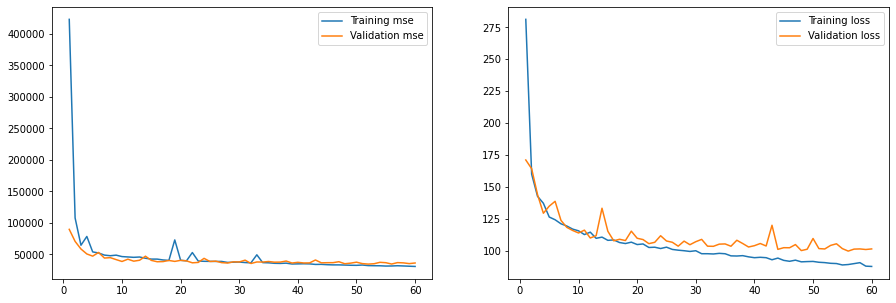

In [5]:
# Model 1 (Functional_Acyclic_Adam_E-60)
input_tensor = X_train.shape[1]
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(input_tensor,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(1)(z)

model = Model(input_tensor, output_tensor)

opt = "Adam"
model.compile(optimizer = opt,
              loss = "mae",
              metrics = ["mse"])

#model.summary()

epochs = 60

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    validation_data = (X_valid,y_valid))


show_all(history)
#################
# Pridiction
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})

# Saving prediction
results_df.to_csv('predictions.csv',index=False)

# Saving model
model.save('Functional_Acyclic_Adam_E-60.h5')

In [ ]:
##############

Epoch 1/60
463/463 [==============================] - 7s 14ms/step - loss: 268.8893 - mse: 346981.5938 - val_loss: 182.6577 - val_mse: 97522.0312
Epoch 2/60
463/463 [==============================] - 6s 14ms/step - loss: 177.3823 - mse: 145672.2188 - val_loss: 149.9628 - val_mse: 64869.7344
Epoch 3/60
463/463 [==============================] - 6s 13ms/step - loss: 160.3307 - mse: 138803.1562 - val_loss: 164.4709 - val_mse: 67096.4688
Epoch 4/60
463/463 [==============================] - 6s 13ms/step - loss: 150.3305 - mse: 100969.3750 - val_loss: 180.1837 - val_mse: 77844.4375
Epoch 5/60
463/463 [==============================] - 6s 13ms/step - loss: 143.3001 - mse: 81781.9062 - val_loss: 131.8914 - val_mse: 47513.1016
Epoch 6/60
463/463 [==============================] - 6s 13ms/step - loss: 139.3537 - mse: 97270.4609 - val_loss: 124.2672 - val_mse: 44758.8516
Epoch 7/60
463/463 [==============================] - 6s 13ms/step - loss: 134.6590 - mse: 70589.2578 - val_loss: 164.7819 - v

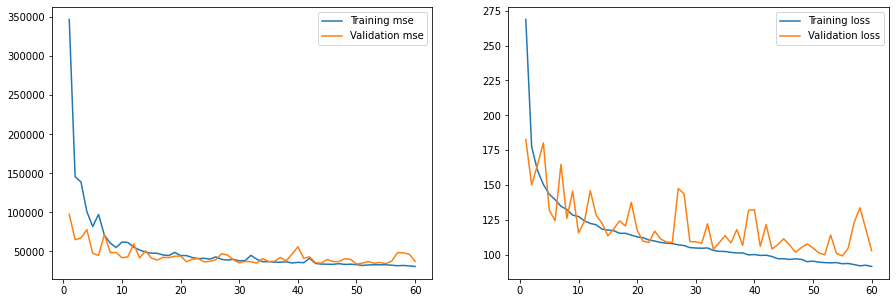

In [6]:
# Model 2 Functional_Acyclic_RMSprop_E-60
input_tensor = X_train.shape[1]
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(input_tensor,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(1)(z)

model = Model(input_tensor, output_tensor)

opt = "RMSprop"
model.compile(optimizer = opt,
              loss = "mae",
              metrics = ["mse"])

#model.summary()
epochs = 60

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    validation_data = (X_valid,y_valid))

show_all(history)
#################
# Pridiction
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})

# Saving prediction
results_df.to_csv('predictions.csv',index=False)

# Saving model
model.save('Functional_Acyclic_RMSprop_E-60.h5')

In [7]:
########################

Trained this model 3 twise and it gives the best result among all models.

Epoch 1/60
463/463 [==============================] - 10s 21ms/step - loss: 315.4019 - mse: 391532.9375 - val_loss: 194.7294 - val_mse: 110744.0781
Epoch 2/60
463/463 [==============================] - 9s 19ms/step - loss: 186.6599 - mse: 118900.4609 - val_loss: 199.6098 - val_mse: 112311.7500
Epoch 3/60
463/463 [==============================] - 7s 16ms/step - loss: 169.8209 - mse: 93598.5391 - val_loss: 152.0735 - val_mse: 67685.6250
Epoch 4/60
463/463 [==============================] - 6s 13ms/step - loss: 157.7898 - mse: 79008.9375 - val_loss: 151.6321 - val_mse: 76032.0078
Epoch 5/60
463/463 [==============================] - 7s 15ms/step - loss: 148.8819 - mse: 69735.4609 - val_loss: 145.8733 - val_mse: 64468.8320
Epoch 6/60
463/463 [==============================] - 9s 20ms/step - loss: 142.5109 - mse: 63627.5156 - val_loss: 141.7244 - val_mse: 61334.9922
Epoch 7/60
463/463 [==============================] - 9s 20ms/step - loss: 140.1339 - mse: 62688.0156 - val_loss: 134.9916 - 

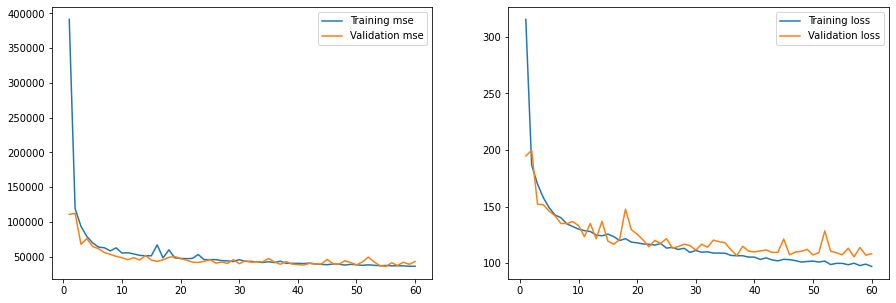

In [8]:
# Model 3 (Sequential_Model_Adam_E-60.h5)

input_shape = X_train.shape[1]
models = tf.keras.models.Sequential
layers = tf.keras.layers

model = models([layers.Dense(1024,input_shape = (input_shape,)),
                layers.Dense(512,activation="relu"),
                layers.Dense(256,activation="relu"),
                layers.Dense(128,activation="relu"),
                layers.Dense(64,activation="relu"),
                layers.Dense(32,activation="relu"),
                layers.Dense(1)])

model.compile(optimizer="Adam",
              loss="mae",
              metrics=["mse"])

history = model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

show_all(history)

# Pridiction
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})

# Saving model
model.save('Functional_Adam_E-60.h5')
# Saving prediction
results_df.to_csv('predictions.csv',index=False)

#### Loading Above Model 3 again:
#### 1. To freeze some of its layers and will try to overfit it a little bit
#### 2. Also using callbacks to change learning rate

This is the number of trainable weights before freezing : 12
This is the number of trainable weights after freezing : 8
Epoch 1/15
463/463 [==============================] - 4s 7ms/step - loss: 110.6379 - mse: 53070.4219 - val_loss: 105.6125 - val_mse: 38940.4531 - lr: 0.0010
Epoch 2/15
463/463 [==============================] - 3s 6ms/step - loss: 88.9423 - mse: 32508.5508 - val_loss: 99.9086 - val_mse: 35871.3750 - lr: 0.0010
Epoch 3/15
463/463 [==============================] - 3s 6ms/step - loss: 87.5636 - mse: 32043.0957 - val_loss: 99.2619 - val_mse: 36058.8984 - lr: 0.0010
Epoch 4/15
463/463 [==============================] - 3s 7ms/step - loss: 87.7859 - mse: 31778.2617 - val_loss: 103.1610 - val_mse: 37968.9062 - lr: 0.0010
Epoch 5/15
463/463 [==============================] - 4s 9ms/step - loss: 83.2108 - mse: 30867.2227 - val_loss: 98.1670 - val_mse: 35727.1758 - lr: 1.0000e-04
Epoch 6/15
463/463 [==============================] - 4s 9ms/step - loss: 82.6187 - mse: 30754.841

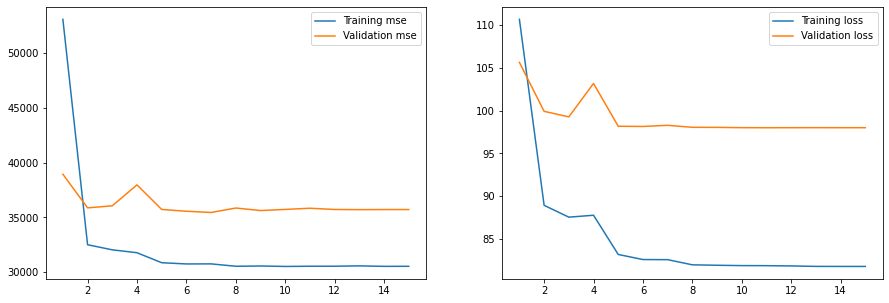

In [9]:
# loading previos model
from tensorflow.keras.models import load_model
model1 = load_model('/content/Functional_Adam_E-60.h5')  # 
#model1.summary()

# Removing Last dense layer 
new_model = Model(model1.inputs, model1.layers[-2].output) # removing layers
#new_model.summary()

# Freezing 4 layers out of 12
print('This is the number of trainable weights ''before freezing :', len(new_model.trainable_weights))

for layer in model1.layers[:2]:
  layer.trainable=False
for layer in model.layers[2:]:
  layer.trainable=True

print('This is the number of trainable weights ''after freezing :', len(new_model.trainable_weights))

# using model as lasyer 
input_shape = X_train.shape[1]

models = tf.keras.models.Sequential
layers = tf.keras.layers

input_tensor = Input(shape=(input_shape,))
x = new_model(input_tensor)
y = layers.Dense(16, activation='relu')(x)
output_tensor = layers.Dense(1)(y)

model = Model(input_tensor, output_tensor)

model.compile(optimizer="Adam",
              loss="mae",
              metrics=["mse"])
epochs = 15

# using callbacks to chanege learning rate
callbacks_list = [tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',factor=0.1,         # lr ko .1 se multiply kerdo (kam kerdo)
                patience=1,)]                         # 10 epochs tak improvement nahe hoto stop hojai

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    validation_data = (X_valid,y_valid),
                    callbacks = callbacks_list)

show_all(history)
############
# Pridiction
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})

# Saving prediction
results_df.to_csv('predictions.csv',index=False)
# Saving model
model.save('Functional_Adam_E-60+25_Freeze_lr.h5')

In [10]:
#####################

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 57)]              0         
                                                                 
 dense_29 (Dense)            (None, 1024)              59392     
                                                                 
 dense_30 (Dense)            (None, 512)               524800    
                                                                 
 dense_35 (Dense)            (None, 128)               65664     
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 1)                 33  

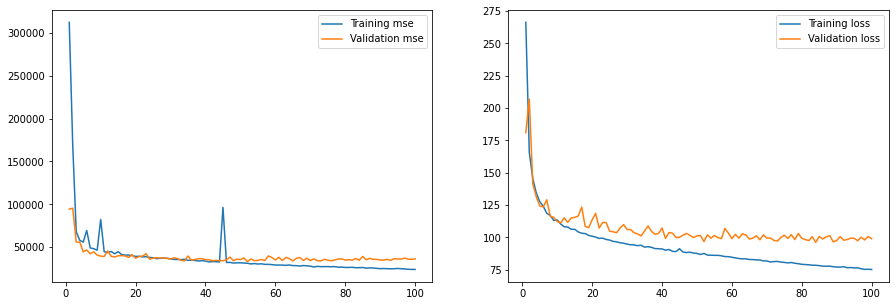

In [11]:
# Model 4 (acyclic graph of layer 100 epochs)
# Not sure that i run this model for 100 or 300 epochs in competition

input_tensor = X_train.shape[1]
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(input_tensor,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(1)(z)

model = Model(input_tensor, output_tensor)

opt = optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer = opt, 
              loss = "mae",
              metrics = ["mse"])

#model.summary()

epochs = 100

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    validation_data = (X_valid,y_valid))

show_all(history)

# Pridiction
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})

# Saving prediction
results_df.to_csv('predictions.csv',index=False)

# Saving model
model.save('6.h5')

In [ ]:
####################

Epoch 1/60
463/463 [==============================] - 7s 14ms/step - loss: 274.4691 - mse: 338531.7188 - val_loss: 188.9389 - val_mse: 94153.8828
Epoch 2/60
463/463 [==============================] - 6s 13ms/step - loss: 183.6636 - mse: 183882.9844 - val_loss: 175.9630 - val_mse: 86088.8281
Epoch 3/60
463/463 [==============================] - 7s 15ms/step - loss: 165.9680 - mse: 189889.2188 - val_loss: 159.2827 - val_mse: 63226.5430
Epoch 4/60
463/463 [==============================] - 7s 14ms/step - loss: 152.1706 - mse: 156611.4375 - val_loss: 132.5159 - val_mse: 54131.1797
Epoch 5/60
463/463 [==============================] - 6s 13ms/step - loss: 145.4054 - mse: 106327.3359 - val_loss: 134.6453 - val_mse: 47950.7891
Epoch 6/60
463/463 [==============================] - 6s 13ms/step - loss: 139.2788 - mse: 77671.5703 - val_loss: 127.4830 - val_mse: 49777.8320
Epoch 7/60
463/463 [==============================] - 6s 13ms/step - loss: 135.1903 - mse: 88034.4688 - val_loss: 122.8625 - 

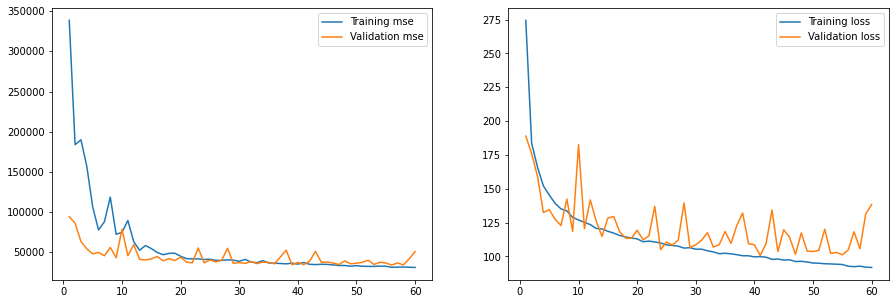

In [12]:
# Model 5 (Functional_Acyclic_RMSprop_E-60.h5)
# Made the same model above, no need to make it again
# Just trying to trace back the step i took to get that accuracy

input_tensor = X_train.shape[1]
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(input_tensor,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(1)(z)

model = Model(input_tensor, output_tensor)

opt = "RMSprop"
model.compile(optimizer = opt, 
              loss = "mae",
              metrics = ["mse"])

#model.summary()

epochs = 60
history = model.fit(X_train, y_train,
                    epochs = epochs,
                    validation_data = (X_valid,y_valid))

show_all(history)

# Pridiction
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})

# Saving prediction
results_df.to_csv('predictions.csv',index=False)

# Saving model
model.save('11.h5')

In [ ]:
################

Epoch 1/120
463/463 [==============================] - 6s 12ms/step - loss: 404.1846 - mse: 451227.9688 - val_loss: 211.1770 - val_mse: 133519.4375
Epoch 2/120
463/463 [==============================] - 7s 15ms/step - loss: 192.9109 - mse: 234961.5625 - val_loss: 172.7579 - val_mse: 98148.7578
Epoch 3/120
463/463 [==============================] - 6s 12ms/step - loss: 166.2576 - mse: 210733.8125 - val_loss: 154.2812 - val_mse: 79533.5469
Epoch 4/120
463/463 [==============================] - 6s 12ms/step - loss: 152.5713 - mse: 179737.2344 - val_loss: 148.2186 - val_mse: 69982.6797
Epoch 5/120
463/463 [==============================] - 6s 13ms/step - loss: 142.2069 - mse: 145746.0469 - val_loss: 143.0944 - val_mse: 66937.1797
Epoch 6/120
463/463 [==============================] - 6s 12ms/step - loss: 137.2968 - mse: 124603.8281 - val_loss: 136.6004 - val_mse: 60461.7852
Epoch 7/120
463/463 [==============================] - 6s 12ms/step - loss: 131.9217 - mse: 96146.8906 - val_loss: 12

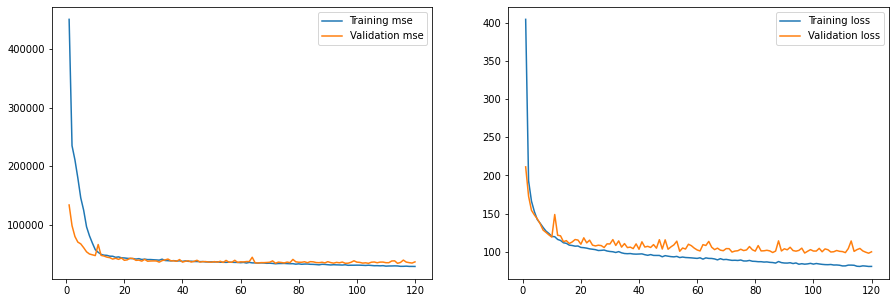

In [13]:
# Model 6 (Functional_Acyclic_Adamax_E-120)
input_tensor = X_train.shape[1]
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

input_tensor = Input(shape=(input_tensor,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(1)(z)

model = Model(input_tensor, output_tensor)

opt = "Adamax"
model.compile(optimizer = opt, 
              loss = "mae",
              metrics = ["mse"])

#model.summary()
epochs = 120

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    validation_data = (X_valid,y_valid))

show_all(history)

# Pridiction
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})

# Saving prediction
results_df.to_csv('predictions.csv',index=False)

# Saving model
model.save('14.h5')

In [ ]:
#########################

Epoch 1/400
463/463 [==============================] - 2s 2ms/step - loss: 681.3420 - mse: 948096.4375 - val_loss: 435.0132 - val_mse: 412801.4375
Epoch 2/400
463/463 [==============================] - 1s 2ms/step - loss: 344.0565 - mse: 349141.3750 - val_loss: 273.0743 - val_mse: 185265.4062
Epoch 3/400
463/463 [==============================] - 1s 2ms/step - loss: 252.9292 - mse: 240390.3594 - val_loss: 229.1933 - val_mse: 148206.9688
Epoch 4/400
463/463 [==============================] - 1s 2ms/step - loss: 225.1215 - mse: 189378.7812 - val_loss: 208.8656 - val_mse: 129699.7422
Epoch 5/400
463/463 [==============================] - 1s 2ms/step - loss: 212.6635 - mse: 165966.2031 - val_loss: 201.4969 - val_mse: 123643.2188
Epoch 6/400
463/463 [==============================] - 1s 2ms/step - loss: 204.7976 - mse: 149722.9531 - val_loss: 193.0413 - val_mse: 114858.3750
Epoch 7/400
463/463 [==============================] - 1s 2ms/step - loss: 197.2542 - mse: 135070.1250 - val_loss: 188

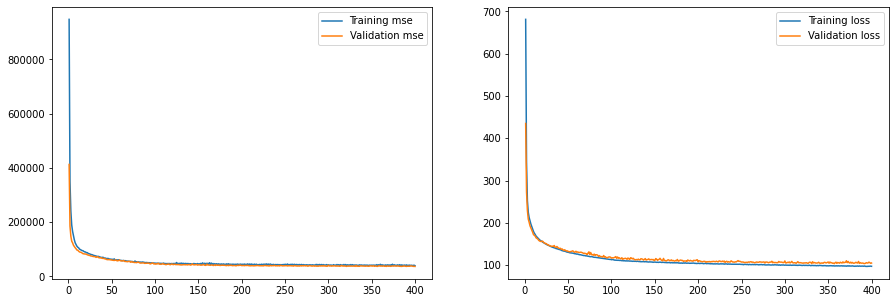

In [14]:
# Model 7 (Sequential_Model_Adam_E-400)
# This model was run and saved twice

input_shape = X_train.shape[1]

models = tf.keras.models.Sequential
layers = tf.keras.layers

model = models([layers.Dense(64,input_shape = (input_shape,)),
                layers.Dense(64,activation="relu"),
                layers.Dense(6,activation="relu"),
                layers.Dense(1)])

model.compile(optimizer="Adam",
              loss="mae",
              metrics=["mse"])

history = model.fit(X_train,y_train,epochs=400,validation_data=(X_valid,y_valid))

show_all(history)

# Pridiction
predictions = model.predict(X_test)
predictions = np.squeeze(predictions)
#predictions = predictions.round()
results_df = pd.DataFrame({'prediction':predictions})

# Saving prediction
results_df.to_csv('predictions.csv',index=False)
# Saving model twice
model.save('Bilal1.h5')
model.save('Bilal2.h5')

### Using Model Assembling 
All of the above model give good score but the top score was achieve by combining pridiction of all these models

In [16]:
# Model Assembling
from tensorflow.keras import layers, optimizers, Input, Model

# loading saved model
from tensorflow.keras.models import load_model
model1 = load_model('/content/1.h5')   # Sequential_Model_Adam_E-400        # 
model2 = load_model('/content/2.h5')   # Sequential_Model_Adam_E-400        #
model3 = load_model('/content/6.h5')   # acyclic graph of layer 100 epochs  #
model4 = load_model('/content/11.h5')  # RMSprop 60                         #
model5 = load_model('/content/14.h5')  # adamax 120                         #
model6 = load_model('/content/Functional_Acyclic_Adam_E-60.h5')             #
model7 = load_model('/content/Functional_Acyclic_RMSprop_E-60.h5')          #
model8 = load_model('/content/Functional_Adam_E-60+25_Freeze_lr.h5')        #

preds_a = model1.predict(X_test)
preds_b = model2.predict(X_test)
preds_c = model3.predict(X_test)
preds_d = model4.predict(X_test)
preds_e = model5.predict(X_test)
preds_f = model6.predict(X_test)
preds_g = model7.predict(X_test)
preds_h = model8.predict(X_test)

a1 = 0.15
a2 = 0.14
a3 = 0.14
a4 = 0.13
a5 = 0.13
a6 = 0.15
a7 = 0.14

final_preds5 = a1 * preds_h + a2 * preds_b +  a3 * preds_c +  a4 * preds_d +  a5 * preds_e +  a6 * preds_f +  a7 * preds_g

predictions = np.squeeze(final_preds5)
results_df = pd.DataFrame({'prediction':predictions})
display(results_df.head(10))

# Saving prediction
results_df.to_csv('predictions.csv',index=False)

,prediction
0,1795.926636
1,368.750122
2,1421.317261
3,288.758545
4,347.936310
5,857.421143
6,1405.467529
7,387.178345
8,1059.951416
9,2863.690918


In [ ]:
# Submission file actual values
#   prediction
#0  1792.4215
#1  360.3604
#2  1394.7914
#3  269.1151
#4  337.61636
#5  848.145
#6  1384.2358
#7  376.1401
#8  1045.7041
#9  2746.7717

The orignal code was in multiple notebooks and was not in order form. 

I tried my best to repeat the process i took to get that score accuracy.  

But there is still difference in score of this notebook and the one i uploaded in the competition.

Hope this notebook help you.

##Regards : Bilal Muhammad Khan